Arboles de Decisión y Random Forest Para Clasificación**
Curso: Estadistica y Probabilidades para la Ciencia de Datos

Profesor: Carlos Ramírez

Alumna: Marjorie González

![Logo AIEP](https://upload.wikimedia.org/wikipedia/commons/1/1c/Logo_aiep.jpg)



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn import tree

%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

1. Cargue el Dataset y reutilice celdas de codigo de su trabajo anterior que considere utiles para guiarse en este trabajo,(pueden ser gráficos, tablas o lo que estime conveniente para mejorar la compresión de su trabajo)

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/cjramirezt/mushrooms/main/Sample-Data-Mushroom-Classification.csv")
df.head ()

,CapShape,CapSurface,CapColor,Bruises,Odor,GillAttachment,GillSpacing,GillSize,GillColor,StalkShape,...,StalkColorAboveRing,StalkColorBelowRing,VeilType,VeilColor,RingNumber,RingType,SporePrintColor,Population,Habitat,Class
0,convex,smooth,brown,True,pungent,free,close,narrow,black,enlarging,...,white,white,partial,white,1,pendant,black,scattered,urban,poisonous
1,convex,smooth,yellow,True,almond,free,close,broad,black,enlarging,...,white,white,partial,white,1,pendant,brown,numerous,grasses,edible
2,bell,smooth,white,True,anise,free,close,broad,brown,enlarging,...,white,white,partial,white,1,pendant,brown,numerous,meadows,edible
3,convex,scaly,white,True,pungent,free,close,narrow,brown,enlarging,...,white,white,partial,white,1,pendant,black,scattered,urban,poisonous
4,convex,smooth,gray,False,none,free,crowded,broad,black,tapering,...,white,white,partial,white,1,evanescent,brown,abundant,grasses,edible


In [ ]:

for columna in df.columns:
  print(columna,df[columna].unique())

CapShape ['convex' 'bell' 'sunken' 'flat' 'knobbed' 'conical']
CapSurface ['smooth' 'scaly' 'fibrous' 'grooves']
CapColor ['brown' 'yellow' 'white' 'gray' 'red' 'pink' 'buff' 'purple' 'cinnamon'
 'green']
Bruises [ True False]
Odor ['pungent' 'almond' 'anise' 'none' 'foul' 'creosote' 'fishy' 'spicy'
 'musty']
GillAttachment ['free' 'attached']
GillSpacing ['close' 'crowded']
GillSize ['narrow' 'broad']
GillColor ['black' 'brown' 'gray' 'pink' 'white' 'chocolate' 'purple' 'red' 'buff'
 'green' 'yellow' 'orange']
StalkShape ['enlarging' 'tapering']
StalkRoot ['equal' 'club' 'bulbous' 'rooted' 'Missing[]']
StalkSurfaceAboveRing ['smooth' 'fibrous' 'silky' 'scaly']
StalkSurfaceBelowRing ['smooth' 'fibrous' 'scaly' 'silky']
StalkColorAboveRing ['white' 'gray' 'pink' 'brown' 'buff' 'red' 'orange' 'cinnamon' 'yellow']
StalkColorBelowRing ['white' 'pink' 'gray' 'buff' 'brown' 'red' 'yellow' 'orange' 'cinnamon']
VeilType ['partial']
VeilColor ['white' 'brown' 'orange' 'yellow']
RingNumber [1 2 

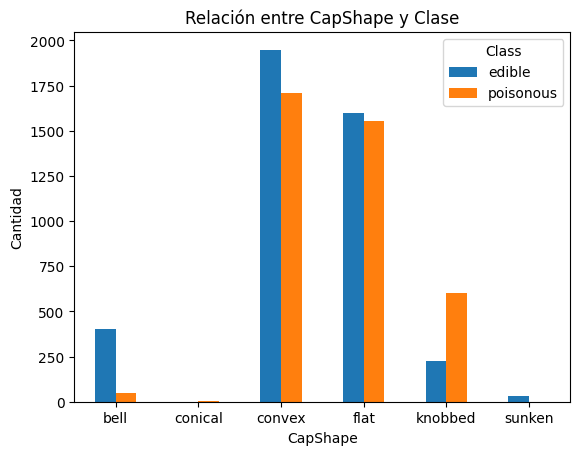

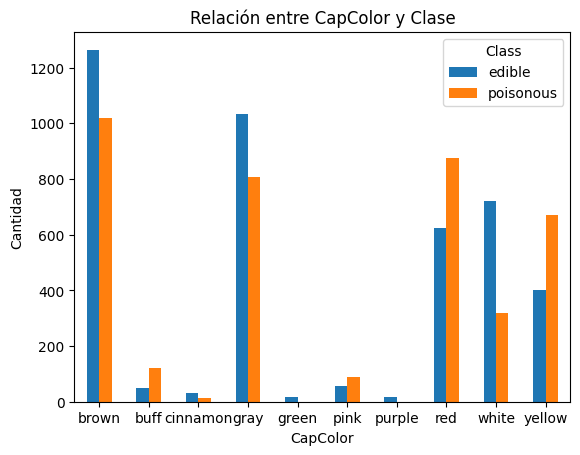

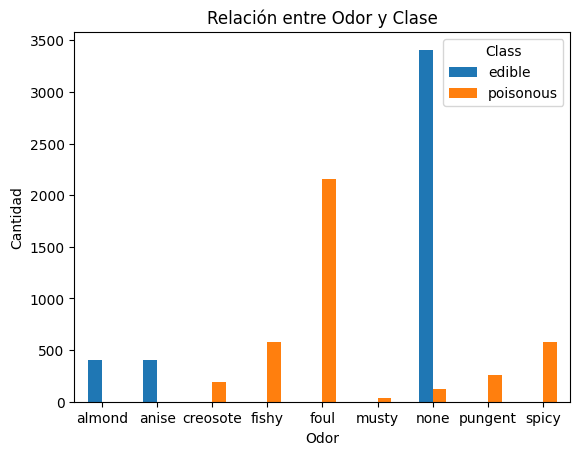

In [ ]:
# Lista de las columnas que deseas analizar
columnas_a_analizar =['CapShape', 'CapColor', 'Odor']

for columna in columnas_a_analizar:
    crosstab=pd.crosstab(df[columna], df['Class'])
    crosstab.plot.bar()
    plt.title(f'Relación entre {columna} y Clase')
    plt.xlabel(columna)
    plt.ylabel('Cantidad')
    plt.xticks(rotation=0)
    plt.show()


2-Separe las variable predictoras y objetivo (Denominelas X e y respectivamente)

In [ ]:
#primero dividimos los datos en caracteristicas y etiquetas
X = df.drop('Class', axis=1)
y = df['Class']


3-transforma las varibles categoricas del dataset X a variables dummy con el siguiente codigo:
X = pd.get_dummies(X)

In [ ]:
X = pd.get_dummies(X)

4-Con las variables predictoras y objetivo separadas separe el dataset en un conjunto de datos de entrenamiento y test en una proporción 80-20

In [ ]:
#dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

5-Entrene un modelo de árbol de desición con la data train y evalue su precision(accuracy)

In [ ]:
#entrenamos el modelo, notar que los arboles de decisión no necesitan escalado de datos, al contrario de el algoritmo knn

classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
classifier.score(X_test, y_test)

1.0

In [ ]:
#ahora realizaremos una predicción
y_pred = classifier.predict(X_test)


6-Genera la matriz de confusión de su modelo en interprete los resultados de la matriz.

R://De acuerdo a la matriz podemos observar que existe una perfecta clasificación  de los datos, ya que los datos del modelo original concuerdan con los resultados que dio el entrenamiento.

In [ ]:
#evaluamos la matriz de confusión
print(confusion_matrix(y_test, y_pred))

[[843   0]
 [  0 782]]


7-Genere un grafico a partir de su árbol de desición(tree_plot) e inspeccione que variables fuerón consideradas como las más importantes de su modelo

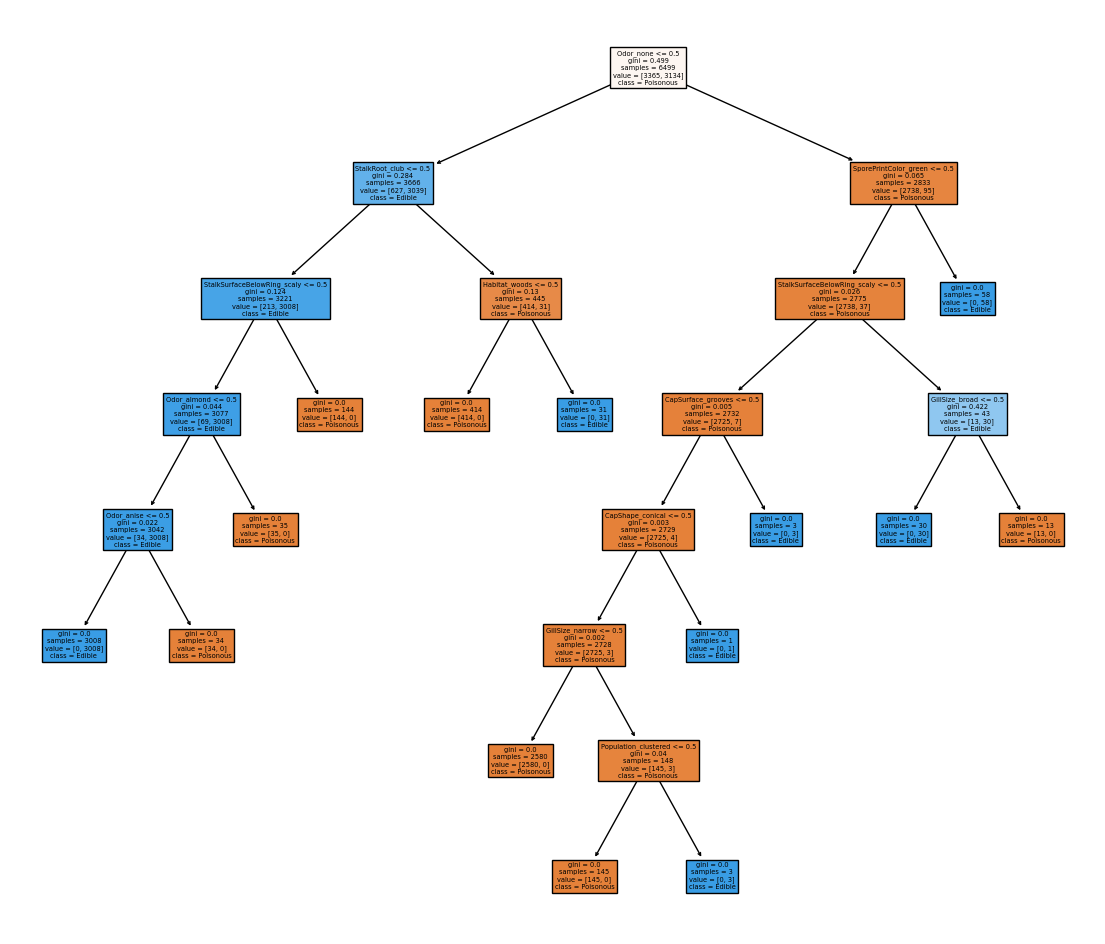

In [ ]:
fig, ax = plt.subplots(1, figsize=(14, 12))
tree.plot_tree(classifier, filled=True, feature_names=X.columns,class_names=['Poisonous','Edible'] )
plt.show()


8-Ademas del gráfico anterior, genere un gráfico de barras en el cual se muestren las variables mas importantes consideradas por el árbol de decisión.

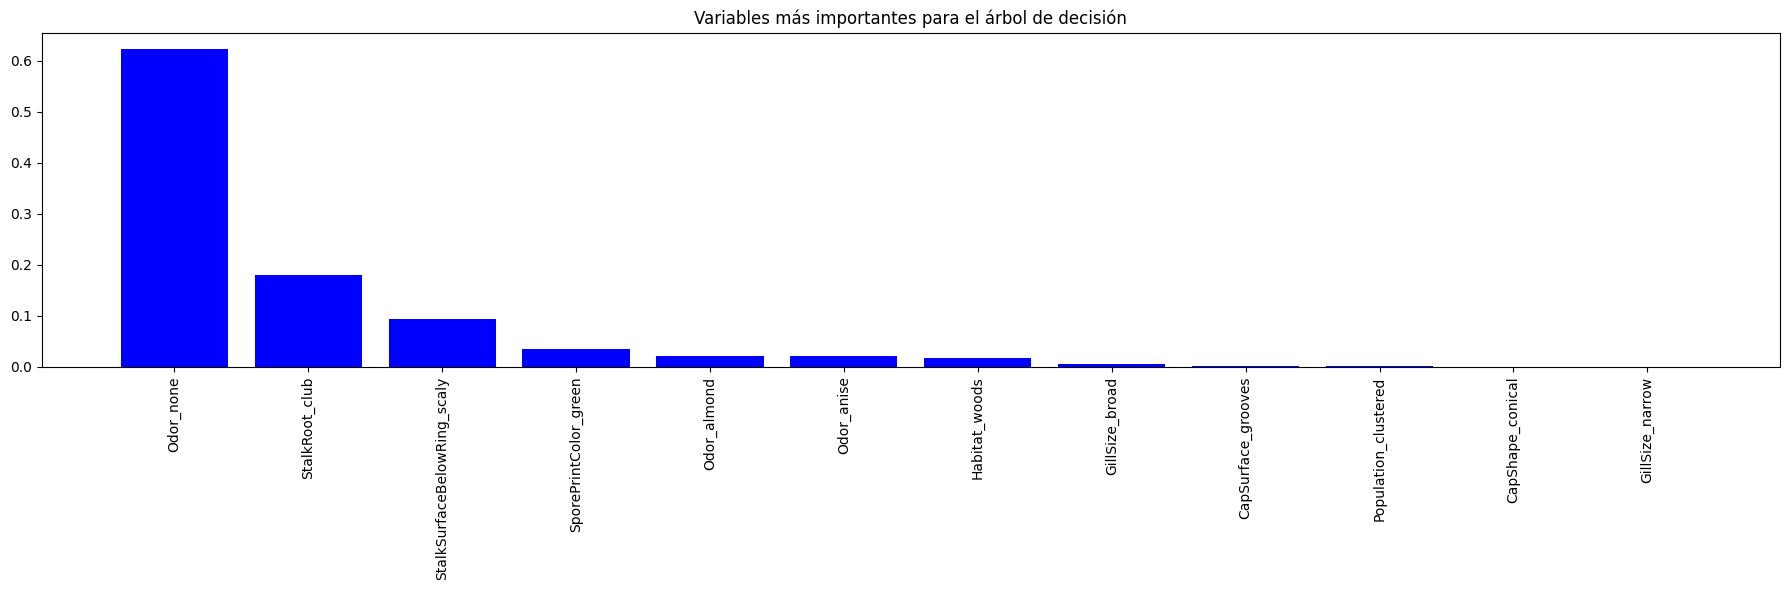

In [ ]:
importances = classifier.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Filtrar variables con importancia 0
features_importantes = [features[i] for i in indices if importances[i] > 0]

# Ajustar el número de barras y nombres de variables
n_variables_importantes = len(features_importantes)
x = range(n_variables_importantes)
plt.figure(figsize=(18, 6))
plt.title("Variables más importantes para el árbol de decisión")
plt.bar(x, importances[indices][:n_variables_importantes], color="blue", align="center")
plt.xticks(x, features_importantes, rotation=90)
plt.tight_layout()
plt.show()



9-Concluya y comente los resultados obtenidos.

R://La variable más representativa para el árbol de decisiones es odor_none ( sin olor), también por debajo de encuentran el odor almond y anisse, donde todos respectivamente si revisamos la clase inicial están catalogados como comestibles.
Otra de las variables importantes son StalkRoot_club también en su mayoría comestible, por otro lado, encontramos StalkSurfaceBelowRing_scaly que tiene muy poca presencia en el data set y SporePrintColor_green	 que a diferencia de los otros en su mayoría son venenosos.

El árbol de decisiones parte tomando como referencia la variable odor none, de acuerdo a sus valores lo separa en 2 ramas StalkRoot_club y SporePrintColor_green ,la rama de StalkRoot_club avanza por StalkSurfaceBelowRing_scaly tomando como referencia a los otros olores agradables, mientras que la rama de SporePrintColor_green avanza por la forma y textura de la capa (cabeza del hongo).


10-Con los mismos datos de entrenamiento genere un Bosque Aleatorio que prediga la variable objetivo

In [ ]:
#ahora entrenaremos un modelo de random forest para clasificar los datos
classifier_rf = RandomForestClassifier()
classifier_rf.fit(X_train, y_train)



RandomForestClassifier()

11-Evalue la precisión del modelo generado y compare con el modelo arbol de desición generado anteriormente, ¿Existen diferencias en precisión?

R:// Ambos modelos no generan diferencias obtuvieron el mismo resultado de precisión con 1.

In [ ]:
#como sera ahora un modelo de random forest?

y_pred = classifier_rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))


[[843   0]
 [  0 782]]


In [ ]:
#calculamos la precisión del modelo
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [ ]:
# prompt: evaluar precicion del modelo random forest

# evaluamos la precisión del modelo
accuracy = classifier.score(X_test, y_test)
print(f"Precisión del modelo de Random Forest: {accuracy:.2f}")

# comparamos con el modelo de árbol de decisión
accuracy_tree = classifier_rf.score(X_test, y_test)
print(f"Precisión del modelo de árbol de decisión: {accuracy_tree:.2f}")

# Si existen diferencias en precisión
if accuracy != accuracy_tree:
    print("Existen diferencias en precisión entre los modelos.")
else:
    print("No existen diferencias en precisión entre los modelos.")


Precisión del modelo de Random Forest: 1.00
Precisión del modelo de árbol de decisión: 1.00
No existen diferencias en precisión entre los modelos.


In [ ]:
#realizamos una predicción
y_pred = classifier_rf.predict(X_test)
#evaluamos la matriz de confusión
print(confusion_matrix(y_test, y_pred))

[[843   0]
 [  0 782]]


12-Realice un gráfico de barras para el modelo Random Forest generado y en base a este grafico determine cuales son las variables más importantes consideradas por el modelo para generar predicciones

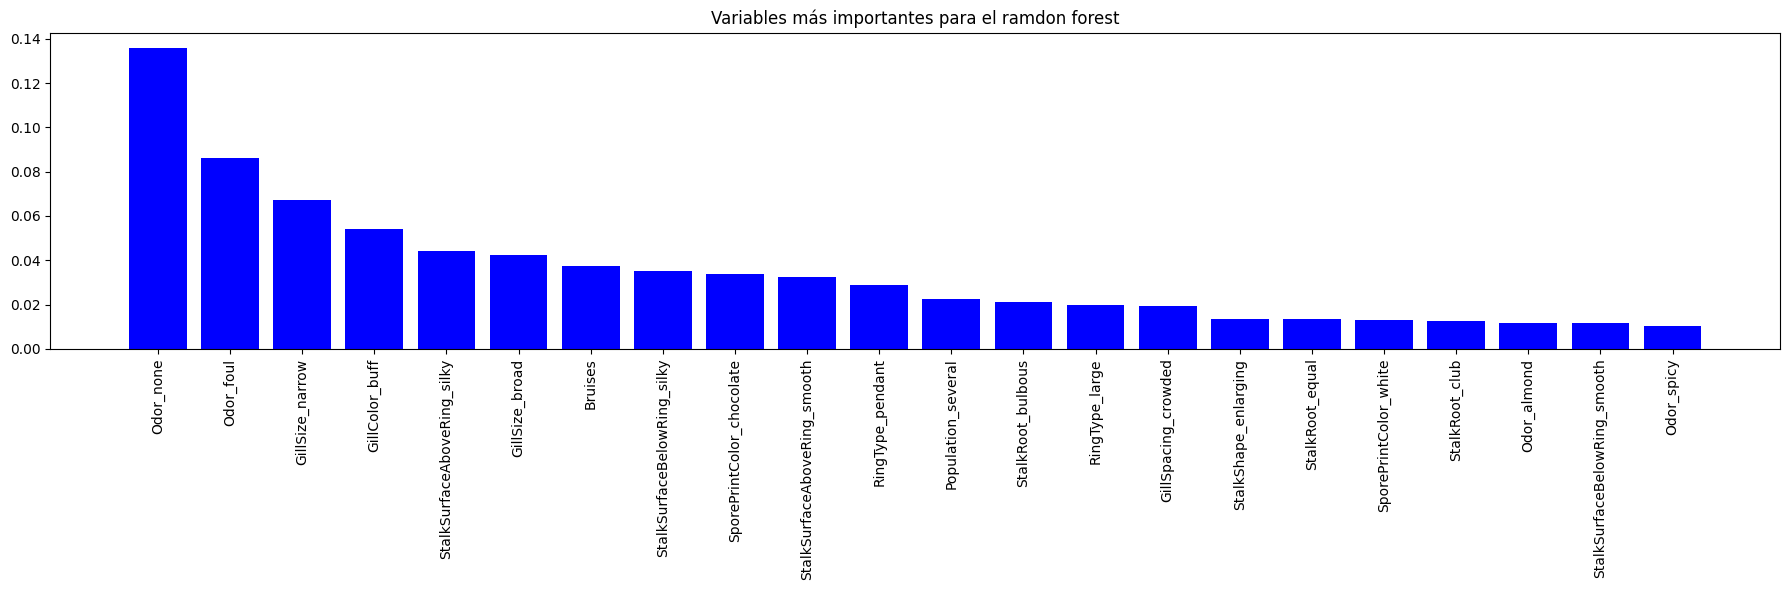

In [ ]:
importances = classifier_rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Filtrar variables con importancia 0
features_importantes = [features[i] for i in indices if importances[i] > 0.01]

# Ajustar el número de barras y nombres de variables
n_variables_importantes = len(features_importantes)
x = range(n_variables_importantes)
plt.figure(figsize=(18, 6))
plt.title("Variables más importantes para el ramdon forest")
plt.bar(x, importances[indices][:n_variables_importantes], color="blue", align="center")
plt.xticks(x, features_importantes, rotation=90)
plt.tight_layout()
plt.show()


13-¿Son las mismas variables importantes consideradas por el árbol de decisión entrenado anteriormente? puede generar una tabla para ver los resultados más claramente con el siguiente código. Concluya y comente los resultados obtenidos.

R:// La primera variable considerada como importante es igual tanto en el árbol de decisiones como en el Random forest ( odor_none), sin embargo, como Random forest realiza más divisiones de los datos para quedarse con el mejor aparecen nuevas variables que el árbol de decisiones en primera instancia no considero como importantes, también toma una muestra más pequeña de los datos, sin embargo, logra llegar al mismo resultado y se ayuda de otras variables para sus predicciones como la característica Gill.

In [ ]:

# Primer data arbol de decicion
importances = pd.DataFrame({'feature':X.columns,'importance':np.round(classifier.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances
#Segundo data random forest
importances_rf = pd.DataFrame({'feature':X.columns,'importance':np.round(classifier_rf.feature_importances_,3)})
importances_rf = importances_rf.sort_values('importance',ascending=False).set_index('feature')
importances_rf
# Concateno las variables mas importantes de los 2 data frame y veo las diferencias.
tabla_comparativa = pd.concat([importances,importances_rf],axis=1)
tabla_comparativa.columns = ['Decision Tree','Random Forest']
tabla_comparativa


,Decision Tree,Random Forest
feature,,
Odor_none,0.623,0.136
StalkRoot_club,0.180,0.013
StalkSurfaceBelowRing_scaly,0.094,0.003
SporePrintColor_green,0.034,0.009
Odor_anise,0.021,0.010
...,...,...
GillColor_brown,0.000,0.002
GillColor_black,0.000,0.000
GillSize_narrow,0.000,0.067


##PARTE II

14- Ahora volvamos atras, en el dataframe original (df) agregue una columna llamada 'Odor_Type' la cual clasifique los olores "desagradables" con -1, los neutros con 0 y los agradables con 1.


In [ ]:
odor_mapping = {'pungent': -1, 'foul': -1, 'creosote': -1, 'fishy': -1, 'spicy': -1, 'musty': -1, 'almond': 1, 'anise': 1, 'none': 0}
df['Odor_Type'] = df['Odor'].map(odor_mapping)

In [ ]:
df2= df.copy()
df2.head()

,CapShape,CapSurface,CapColor,Bruises,Odor,GillAttachment,GillSpacing,GillSize,GillColor,StalkShape,...,StalkColorBelowRing,VeilType,VeilColor,RingNumber,RingType,SporePrintColor,Population,Habitat,Class,Odor_Type
0,convex,smooth,brown,True,pungent,free,close,narrow,black,enlarging,...,white,partial,white,1,pendant,black,scattered,urban,poisonous,-1
1,convex,smooth,yellow,True,almond,free,close,broad,black,enlarging,...,white,partial,white,1,pendant,brown,numerous,grasses,edible,1
2,bell,smooth,white,True,anise,free,close,broad,brown,enlarging,...,white,partial,white,1,pendant,brown,numerous,meadows,edible,1
3,convex,scaly,white,True,pungent,free,close,narrow,brown,enlarging,...,white,partial,white,1,pendant,black,scattered,urban,poisonous,-1
4,convex,smooth,gray,False,none,free,crowded,broad,black,tapering,...,white,partial,white,1,evanescent,brown,abundant,grasses,edible,0


15-Repita el proceso realizado desde los puntos 2 al 13, pero con df con la columna 'Odor_Type' agregada.

In [ ]:
#2-Separe las variable predictoras y objetivo (Denominelas X e y respectivamente)
X = df2.drop('Class', axis=1)
y = df2['Class']

In [ ]:
#3-transforma las varibles categoricas del dataset X a variables dummy con el siguiente codigo: X = pd.get_dummies(X)
X = pd.get_dummies(X)

In [ ]:
#4-Con las variables predictoras y objetivo separadas separe el dataset en un conjunto de datos de entrenamiento y test en una proporción 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
#5-Entrene un modelo de arbol de desición con la data train y evalue su precision(accuracy)
classifier2 = DecisionTreeClassifier(random_state=42)
classifier2.fit(X_train, y_train)
classifier2.score(X_test, y_test)

1.0

In [ ]:
#ahora realizaremos una predicción
y_pred = classifier2.predict(X_test)

In [ ]:
#6-Genera la matriz de confusión de su modelo en interprete los resultados de la matriz
print(confusion_matrix(y_test, y_pred))

[[843   0]
 [  0 782]]


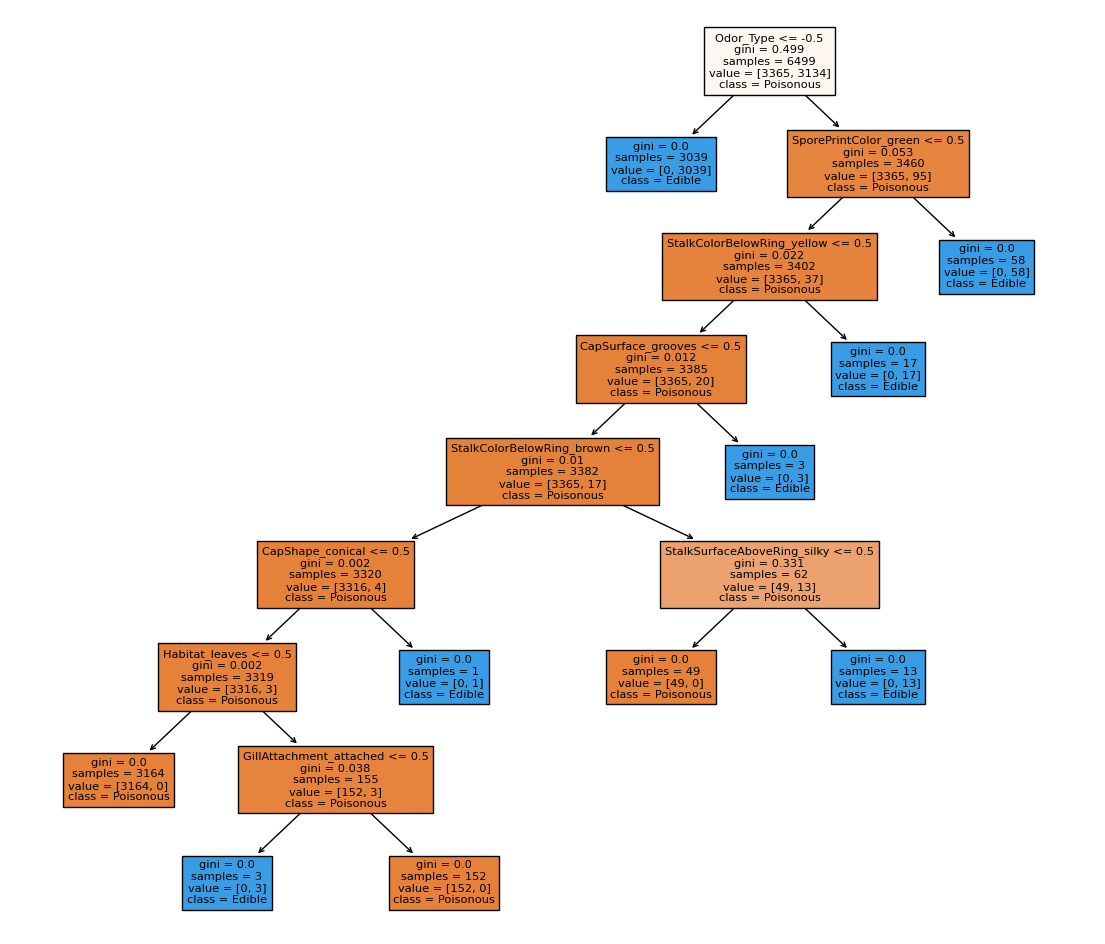

In [ ]:
#7-Genere un grafico a partir de su arbol de desición(tree_plot) e inspeccione que variables fuerón consideradas como las más importantes de su modelo
fig, ax = plt.subplots(1, figsize=(14, 12))
tree.plot_tree(classifier2, filled=True, feature_names=X.columns,class_names=['Poisonous','Edible'] )
plt.show()

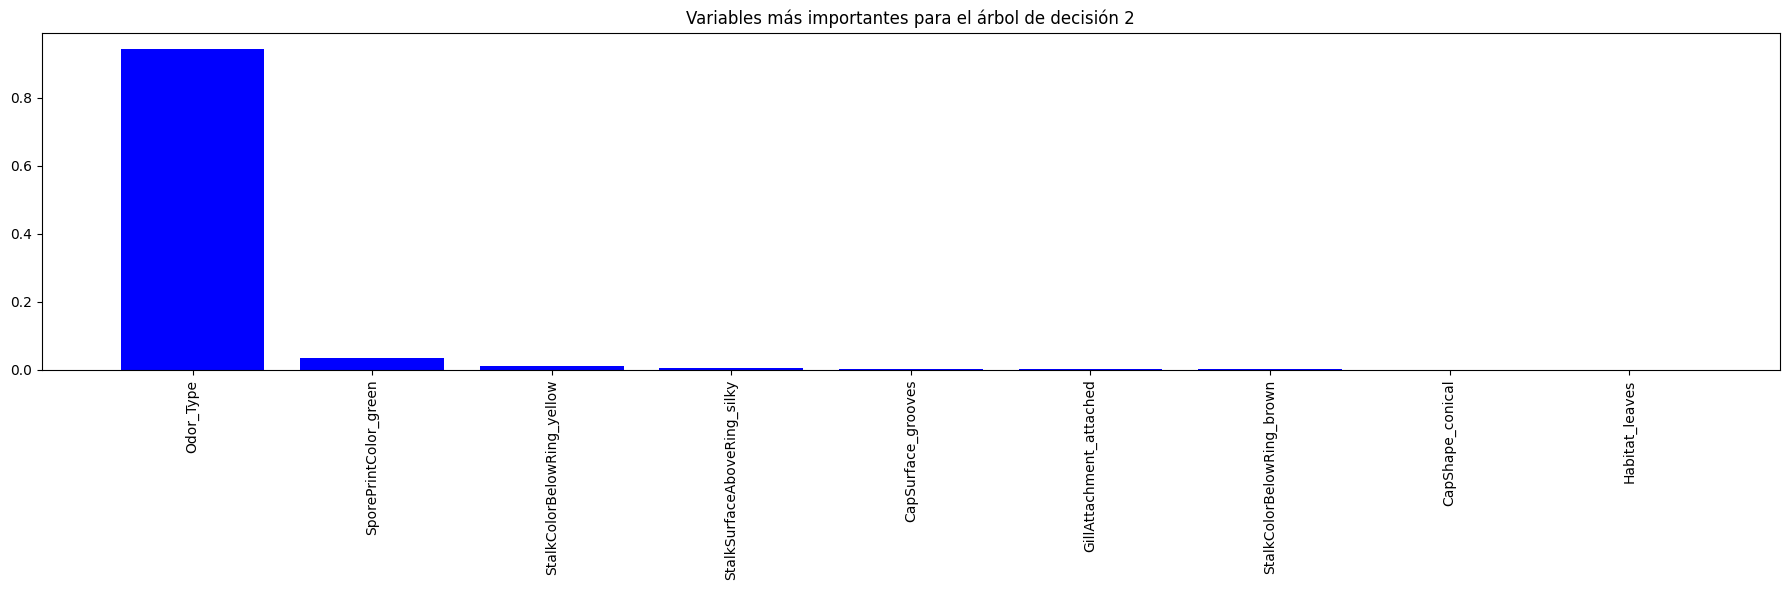

In [ ]:
#8-Ademas del grafico anterior genere un grafico de barras en el cual se muestren las variables mas importantes consideradas por el arbol de decisión para generar sus predicciones, use como argumento 'class_names=['Poisonous','Edible']' en la función tree_plot para viasualizar e interpretar de manera mas clara sus resultados
importances1 = classifier2.feature_importances_
indices = np.argsort(importances1)[::-1]
features = X.columns

# Filtrar variables con importancia 0
features_importantes = [features[i] for i in indices if importances1[i] > 0]

# Ajustar el número de barras y nombres de variables
n_variables_importantes = len(features_importantes)
x = range(n_variables_importantes)
plt.figure(figsize=(18, 6))
plt.title("Variables más importantes para el árbol de decisión 2")
plt.bar(x, importances1[indices][:n_variables_importantes], color="blue", align="center")
plt.xticks(x, features_importantes, rotation=90)
plt.tight_layout()
plt.show()

9-Concluya y comente los resultados obtenidos

R://La única variable que cambio es que ya no toma odor none, sino que la columna creada odor type y también toma la variable SporePrintColor_green, pero las demás cambian.
El árbol de decisión parte por la variable odor type luego se abre hacia la variable SporePrintColor_green baja por Stalkcolorbellowring_yellow hacia
capsurface_groove , luego Stalkcolorbellowring_brown, capchape_conical para terminar en habitat_leaves .
el Stalkcolorbellowring_brown también genera una rama para stalksurfaceabovering_silky.


In [ ]:
#10-Con los mismos datos de entrenamiento genere un Bosque Aleatorio que prediga la variable objetivo

classifier_rf2 = RandomForestClassifier()
classifier_rf2.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
#11-Evalue la precisión del modelo generado y compare con el modelo arbol de desición generado anteriormente, ¿Existen diferencias en precisión?
#Matriz de confusión
y_pred = classifier_rf2.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[843   0]
 [  0 782]]


In [ ]:
#calculamos la precisión del modelo
classifier_rf2.score(X_test, y_test)

1.0

 ¿Existen diferencias en precisión?

In [ ]:
# evaluamos la precisión del modelo
accuracy = classifier2.score(X_test, y_test)

# comparamos con el modelo de árbol de decisión
accuracy_tree = classifier_rf2.score(X_test, y_test)


# Si existen diferencias en precisión
if accuracy != accuracy_tree:
    print("Existen diferencias en precisión entre los modelos.")
else:
    print("No existen diferencias en precisión entre los modelos.")


No existen diferencias en precisión entre los modelos.


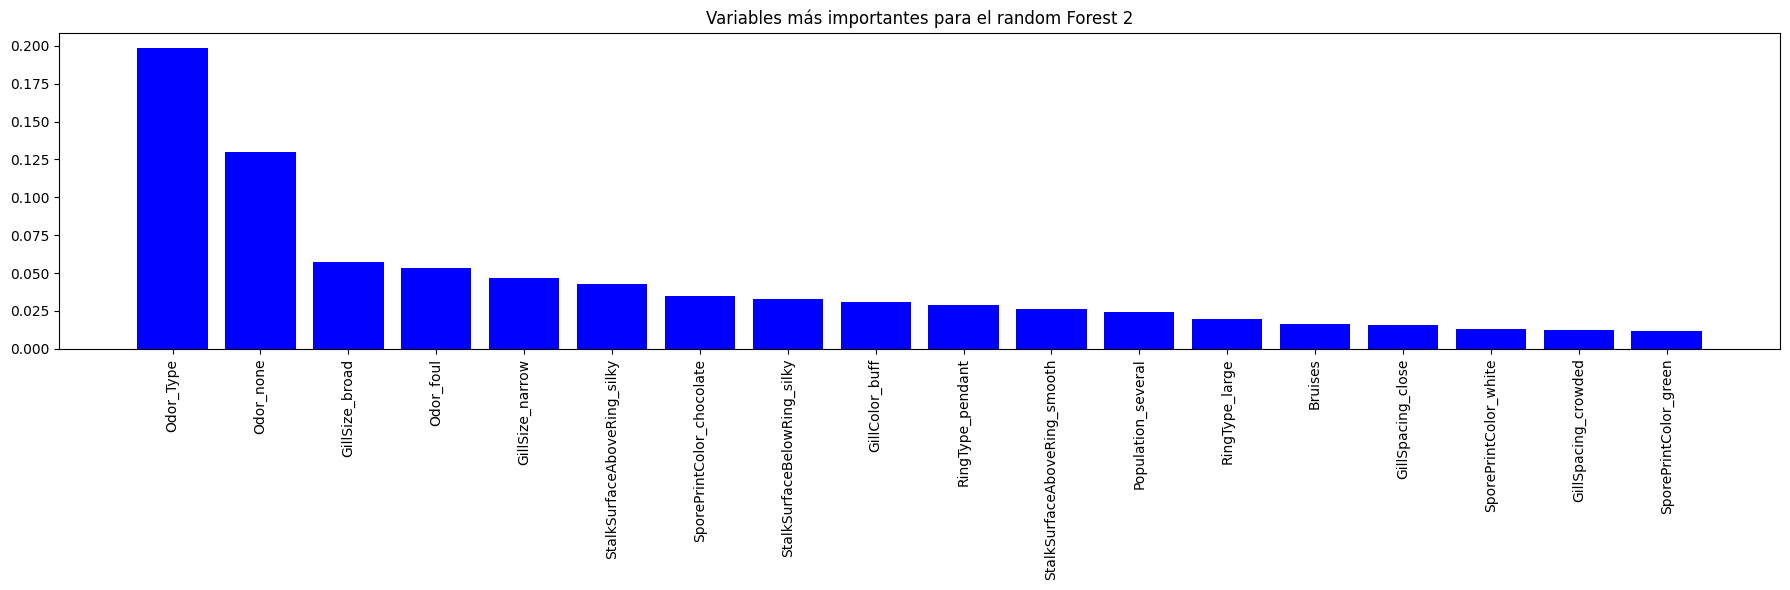

In [ ]:
#12-Realice un grafico de barras para el modelo Random Forest generado y en base a este grafico determine cuales son las variables mas importantes consideradas por el modelo para generar predicciones

importances2 = classifier_rf2.feature_importances_
indices = np.argsort(importances2)[::-1]
features = X.columns

# Filtrar variables con importancia 0
features_importantes2 = [features[i] for i in indices if importances2[i] > 0.01]

# Ajustar el número de barras y nombres de variables
n_variables_importantes = len(features_importantes2)
x = range(n_variables_importantes)
plt.figure(figsize=(18, 6))
plt.title("Variables más importantes para el random Forest 2")
plt.bar(x, importances2[indices][:n_variables_importantes], color="blue", align="center")
plt.xticks(x, features_importantes2, rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
#13-¿Son las mismas variables importantes consideradas por el arbol de decisión entrenado anteriormente?

#Al igual que ela arbol de deciciones la variable mas importante es odor type ,
#pero a diferencia del albol de decicion el random forest si considera tambien la variable odor none
# y las  demas variables de este se alejan del arbol de deciciones.

In [ ]:


# Primer data arbol de decicion
importances1 = pd.DataFrame({'feature':X.columns,'importance':np.round(classifier2.feature_importances_,3)})
importances1 = importances1.sort_values('importance',ascending=False).set_index('feature')
importances1
#Segundo data random forest
importances_rf2 = pd.DataFrame({'feature':X.columns,'importance':np.round(classifier_rf2.feature_importances_,3)})
importances_rf2 = importances_rf2.sort_values('importance',ascending=False).set_index('feature')
importances_rf2
# Concateno las variables mas importantes de los 2 data frame y veo las diferencias.
tabla_comparativa = pd.concat([importances1,importances_rf2],axis=1)
tabla_comparativa.columns = ['Decision Tree','Random Forest']
tabla_comparativa




,Decision Tree,Random Forest
feature,,
Odor_Type,0.943,0.193
SporePrintColor_green,0.032,0.011
StalkColorBelowRing_yellow,0.013,0.001
StalkRoot_bulbous,0.007,0.010
StalkColorBelowRing_brown,0.002,0.002
...,...,...
GillSize_broad,0.000,0.046
GillSpacing_crowded,0.000,0.008
GillSpacing_close,0.000,0.014


Las preguntas de incluidas en el punto 15 la responderé en conjunto con el punto 16 ,   ¿Existen diferencias en los resultados obtenidos? ¿Cuales? ¿Por qué cree que se dieron estos resultados? esto contradice y reafirma el conocimiento previo que tenía con respecto a los datos?
ya que considero que sería redundar en lo mismo.

#16-concluya sobre los resultados obtenidos.

R:// Si bien en esta segunda instancia donde  se agrega la columna odor type identificando 1 olores agradables y -1 olores desagradables y con 0 odor none tanto el árbol de decisión como el Random forest la identifican como la variable decidora en la clasificación de los hongos el resto de las variables también están presente, tal vez cambian de lugar pero siguen presentes, esto es generado por la consistencia de los datos del data original, sabiendo de ante mano por trabajo anterior que el olor es una variable importante a la hora de catalogar un hongo como comestible o venenoso, podemos afirmar que este algoritmos de árbol de decisión es una arma fundamental para poder comprobar y entrenar los datos y llegar a mejores conclusiones o reafirmar lo que se sabe, claramente siempre hay una mínima posibilidad de error pero cuando los datos parecen confusos es una buena herramienta para poder llegar a una conclusión y tomar decisiones.
